## Pytorch Basics

In [1]:
# Built-in library
from typing import Any, Optional, Sequence, Union

# Standard imports
import numpy as np
import torch
import pandas as pd
import matplotlib.pyplot as plt


# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 2_000

# Black code formatter (Optional)
%load_ext lab_black
# auto reload imports
%load_ext autoreload
%autoreload 2

### Create A Vector (1-D)

In [2]:
# Using NumPy
np_arr = np.array([2, 4, 6])
np_arr

array([2, 4, 6])

In [3]:
# Using Pytorch
py_arr = torch.tensor([2, 4, 6])
py_arr

tensor([2, 4, 6])

### Create Matrixes

In [4]:
np_arr1 = np.array([[2, 3, 4], [10, 12, 14]])
np_arr1

array([[ 2,  3,  4],
       [10, 12, 14]])

In [5]:
py_arr1 = torch.tensor([[2, 3, 4], [10, 12, 14]])
py_arr1

tensor([[ 2,  3,  4],
        [10, 12, 14]])

In [6]:
np_arr1.T

array([[ 2, 10],
       [ 3, 12],
       [ 4, 14]])

In [7]:
py_arr1.T

tensor([[ 2, 10],
        [ 3, 12],
        [ 4, 14]])

In [8]:
type(np_arr1), type(py_arr1)

(numpy.ndarray, torch.Tensor)

### Dot Product

In [9]:
# Using NumPy
np_arr, np_arr1 = np.array([1, 2, 3, 4]), np.array([0, 1, 0, -1])

print(np.dot(np_arr, np_arr1))

# Using vanilla Python and NumPy
np.sum(np_arr * np_arr1)

-2


-2

In [10]:
# Using Pytorch
py_arr, py_arr1 = torch.tensor([1, 2, 3, 4]), torch.tensor([0, 1, 0, -1])
print(torch.dot(py_arr, py_arr1))

# Using vanilla Python and Pytorch
torch.sum(py_arr * py_arr1)

tensor(-2)


tensor(-2)

### Matrix Multiplication

In [11]:
# Using NumPy
np_arr, np_arr1 = (
    np.array([[2, 3, 4], [7, 8, 9]]),
    np.array([[2, 45], [7, 11], [-1, 1]]),
)
np_arr2 = np.array([[19, 3, 34], [-2, 7, 11], [-3, 3, 0]])

np_arr.shape, np_arr1.shape, np_arr2.shape

((2, 3), (3, 2), (3, 3))

In [12]:
# Using the method
print(np.matmul(np_arr, np_arr1))

# Using another notation
print(np_arr @ np_arr1)

np.matmul(np_arr1.T, np_arr2)

[[ 21 127]
 [ 61 412]]
[[ 21 127]
 [ 61 412]]


array([[  27,   52,  145],
       [ 830,  215, 1651]])

In [13]:
# Using Pytorch
# Using NumPy
py_arr, py_arr1 = (
    torch.tensor([[2, 3, 4], [7, 8, 9]]),
    torch.tensor([[2, 45], [7, 11], [-1, 1]]),
)
py_arr2 = torch.tensor([[19, 3, 34], [-2, 7, 11], [-3, 3, 0]])

py_arr.shape, py_arr1.shape, py_arr2.shape

(torch.Size([2, 3]), torch.Size([3, 2]), torch.Size([3, 3]))

In [14]:
# Using the method
print(torch.matmul(py_arr, py_arr1))

# Using another notation
print(py_arr @ py_arr1)

np.matmul(py_arr1.T, py_arr2)

tensor([[ 21, 127],
        [ 61, 412]])
tensor([[ 21, 127],
        [ 61, 412]])


tensor([[  27,   52,  145],
        [ 830,  215, 1651]])

### Softmax

$$ \sigma_{i} = \frac{e^{z_i}}{\sum{e^{z_i}}} $$

In [15]:
import torch.nn as nn

In [16]:
# Compute sofmax manually in NumPy
z = [1, 2, 3]

numerator = np.exp(z)
denominator = np.sum(np.exp(z))

softmax = numerator / denominator
softmax, np.sum(softmax)

(array([0.09003057, 0.24472847, 0.66524096]), 1.0)

In [17]:
# Repeat with some random numbers
z = np.random.randint(low=-5, high=15, size=25)
print(z)

# Compute the softmax
numerator = np.exp(z)
denominator = np.sum(np.exp(z))

softmax = numerator / denominator
softmax, np.sum(softmax)

[ 9  4 11 -1  9 13  5  6 14  9  5 -3 -3 -2 -1  4  1 -1  3 -4  5  4  2 -2
 12]


(array([4.28055145e-03, 2.88421288e-05, 3.16292348e-02, 1.94336735e-07,
        4.28055145e-03, 2.33710190e-01, 7.84010346e-05, 2.13116108e-04,
        6.35290163e-01, 4.28055145e-03, 7.84010346e-05, 2.63006171e-08,
        2.63006171e-08, 7.14924895e-08, 1.94336735e-07, 2.88421288e-05,
        1.43596504e-06, 1.94336735e-07, 1.06104262e-05, 9.67545631e-09,
        7.84010346e-05, 2.88421288e-05, 3.90335767e-06, 7.14924895e-08,
        8.59771741e-02]),
 1.0)

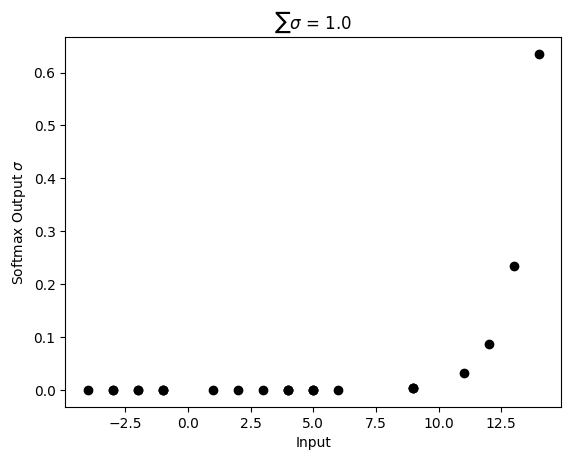

In [18]:
# Visualize
plt.plot(z, softmax, "ko")
plt.xlabel("Input")
plt.ylabel("Softmax Output $\sigma$")
plt.title(f"$\sum\sigma$ = {np.sum(softmax)}")
plt.show()

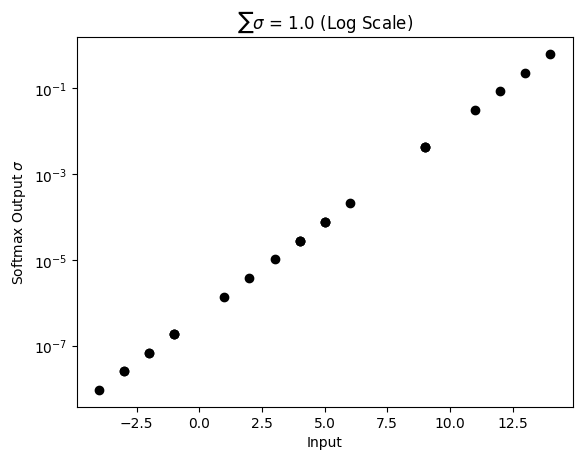

In [19]:
# Visualize
plt.plot(z, softmax, "ko")
plt.xlabel("Input")
plt.ylabel("Softmax Output $\sigma$")
plt.yscale("log")
plt.title(f"$\sum\sigma$ = {np.sum(softmax)} (Log Scale)")
plt.show()

### Softmax Using Pytorch

In [20]:
z = [1, 2, 3]
softmax_result = nn.Softmax(dim=0)
sigma_pytorch = softmax_result(torch.Tensor(z))
print(sigma_pytorch)

tensor([0.0900, 0.2447, 0.6652])


In [21]:
torch.tensor([1, 2, 3]), torch.Tensor([1, 2, 3]),

(tensor([1, 2, 3]), tensor([1., 2., 3.]))

In [22]:
nn.Softmax(dim=0)(torch.tensor(z, dtype=float))

tensor([0.0900, 0.2447, 0.6652], dtype=torch.float64)

### Entropy (H)

```
- it has the highest value (1.0) at p(x) = 0.5
- high value of entropy means a lot of variability while low entropy means that most of the values in the dataset repeat.
- The formula of entropy as a negative value because the log of values between 0 and 1 is negative. i.e -ve x -ve = +ve
```

$$H = - \sum^n_{i = 1}{p(x_i)log_2(p(x_i))}$$

<br>

In [23]:
# Wrong computation of entropy
p = 0.25  # prob of an event happening

H = -(p * np.log2(p))
H

0.5

In [24]:
# The correct computation of entropy
p = [0.25, 0.75]  # prob of event happening and NOT happening.
H = -(np.sum(p * np.log2(p)))
H

0.8112781244591328

In [25]:
# OR
# Binary Cross entropy
H = -((0.25 * np.log2(0.25)) + (0.75 * np.log2(0.75)))
H

0.8112781244591328

### Cross Entropy

```
- It describes the relationship between two probability distributions.
- In DL, it's used to evaluate the model.
```

$$H(p, q) = - \sum^n_{i = 1}{p(x_i)log_2(q(x_i))}$$

In [26]:
# Cross entropy
p = [1, 0.0]  # sum=1.0 i.e prob that an image is a dog and NOT a dog
q = [0.25, 0.75]  # sum=1.0 i.e prob that the model thinks image is a dog and NOT a dog

H = -(np.sum(p * np.log2(q)))
H

2.0

In [27]:
# Binary cross entropy: It's used as a loss function
H = -((1 * np.log2(0.25)) + (0 * np.log2(0.75)))
H

2.0

In [28]:
# Using Pytorch
import torch.nn.functional as F

# Incorrect: q has to come before p
F.binary_cross_entropy(torch.tensor(p), torch.tensor(q))

tensor(75.)

In [29]:
# Correct: q has to come before p
H_py = F.binary_cross_entropy(torch.tensor(q), torch.tensor(p))
H_py

tensor(1.3863)

### Seeding

In [30]:
# NumPy
# Method 1
np.random.seed(123)
print(np.random.randn(5))
print(np.random.randn(5))

[-1.0856306   0.99734545  0.2829785  -1.50629471 -0.57860025]
[ 1.65143654 -2.42667924 -0.42891263  1.26593626 -0.8667404 ]


In [31]:
# Method 2
rnd_seed_1 = np.random.RandomState(1)
rnd_seed_2 = np.random.RandomState(2)

print(rnd_seed_1.randn(5))
print(rnd_seed_2.randn(5))
print()
print(rnd_seed_1.randn(5))
print(rnd_seed_2.randn(5))

[ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763]
[-0.41675785 -0.05626683 -2.1361961   1.64027081 -1.79343559]

[-2.3015387   1.74481176 -0.7612069   0.3190391  -0.24937038]
[-0.84174737  0.50288142 -1.24528809 -1.05795222 -0.90900761]


In [32]:
# Pytorch
torch.random.manual_seed(123)

torch.randn(5)

tensor([-0.1115,  0.1204, -0.3696, -0.2404, -1.1969])

### T Test

```
- It's used to determine whether data drawn from one distribution is significantly different from data drawn from another distribution.
```

$$t_k = \frac{\bar{x} - \bar{y}}{\frac{s}{\sqrt{n}}}$$

In [33]:
import scipy.stats as stats

# Number of samples
n_1, n_2 = 30, 40
# Population means
mu_1, mu_2 = 1, 2

# Generate data
data_1 = mu_1 + np.random.randn(n_1)
data_2 = mu_2 + np.random.randn(n_2)

In [34]:
np.zeros(n_1)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

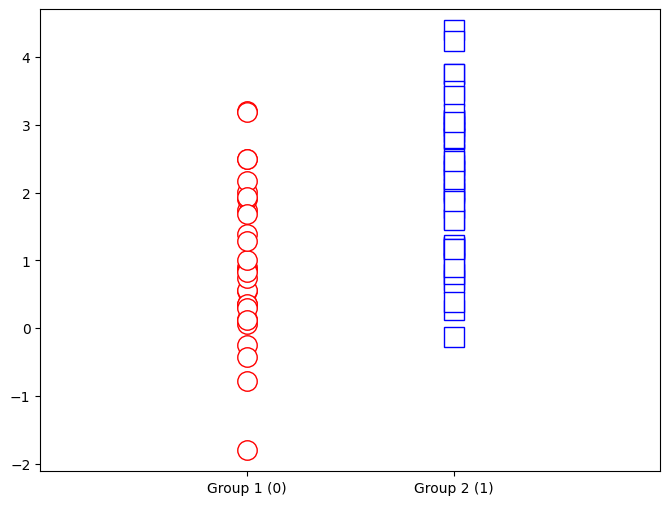

In [35]:
# Visualize
plt.figure(figsize=(8, 6))

plt.plot(np.zeros(n_1), data_1, "ro", mfc="w", ms=14)
plt.plot(np.ones(n_2), data_2, "bs", mfc="w", ms=14)
plt.xlim([-1, 2])
plt.xticks(ticks=[0, 1], labels=["Group 1 (0)", "Group 2 (1)"])
plt.show()

In [36]:
# Calculate t-test
# Independent variable: Calculate the T-test for the means of *two independent* samples of scores.
t_value, p_value = stats.ttest_ind(data_1, data_2)
t_value, p_value

(-4.117797280825477, 0.00010582025990984099)

#### Comment(s)

```
- Group 2 has a larger mean compared to group 1. i.e the means are statistically different.
- For the p value to be statistically different, the pvalue should be less than 0.05.
```

### Derivatives

```
- This is the slope of the function at each point.
- Derivatives point in the direction of increases and decreases in a mathematical function.
- In DL, the task (classification, regression, etc) is represented as an error function and the best solution is the point with the smallest error.
- The derivative tells us the direction to 'move' in that error landscape in order to find the optimal solution.
```

In [37]:
import sympy as sym  # Symbolic Python
import sympy.plotting.plot as symplot

# make the equations look nicer
from IPython.display import display

In [38]:
# Create symbolic variables
x = sym.symbols("x")

# Create functions
fx = 2 * x**2
gx = 4 + (x**3) - (3 * x**4)

In [39]:
print("fx:")
display(fx)
print()
print("gx:")
display(gx)

fx:


2*x**2


gx:


-3*x**4 + x**3 + 4

In [40]:
# Compute the individual derivatives
df = sym.diff(fx)
dg = sym.diff(gx)


display(df)
display(dg)

4*x

-12*x**3 + 3*x**2

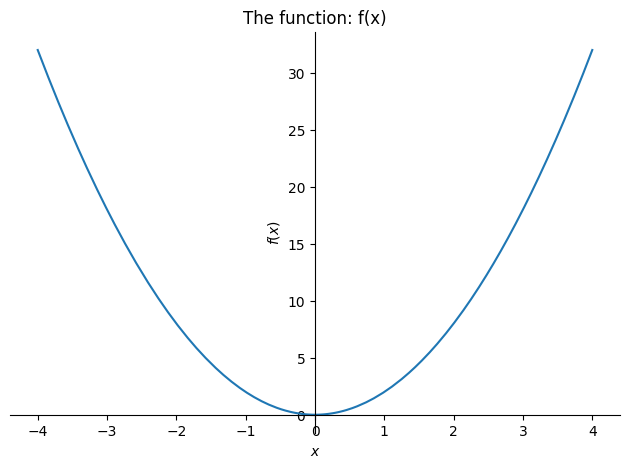

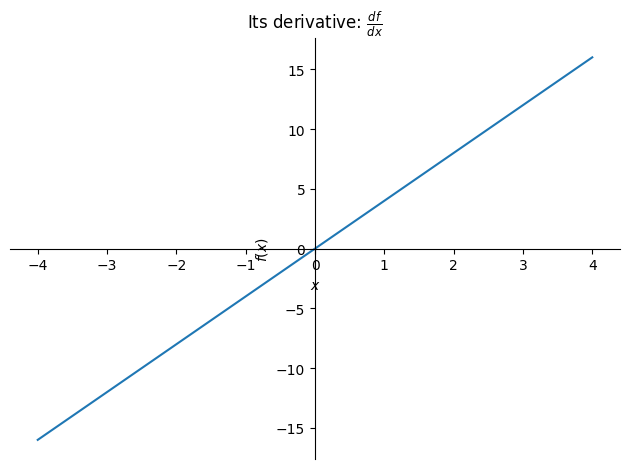

In [41]:
# plot them
symplot(fx, (x, -4, 4), title="The function: f(x)")
plt.show()

symplot(df, (x, -4, 4), title="Its derivative: $\\frac{df}{dx}$")
plt.show()

In [42]:
# ReLU and Sigmoid Functions
relu = sym.Max(0, x)
sigmoid = 1 / (1 + sym.exp(-x))

display(relu)
display(sigmoid)

Max(0, x)

1/(1 + exp(-x))

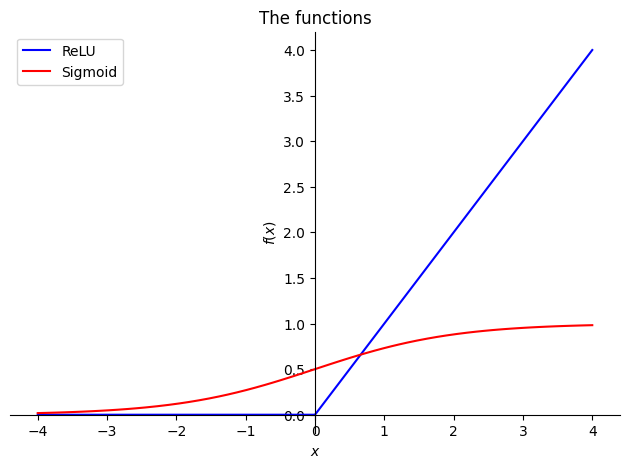

In [43]:
# Visualize the functions
# source: udemy.com/course/deeplearning_x/?couponCode=202303
p = symplot(relu, (x, -4, 4), label="ReLU", show=False, line_color="blue")
p.extend(symplot(sigmoid, (x, -4, 4), label="Sigmoid", show=False, line_color="red"))
p.legend = True
p.title = "The functions"
p.show()

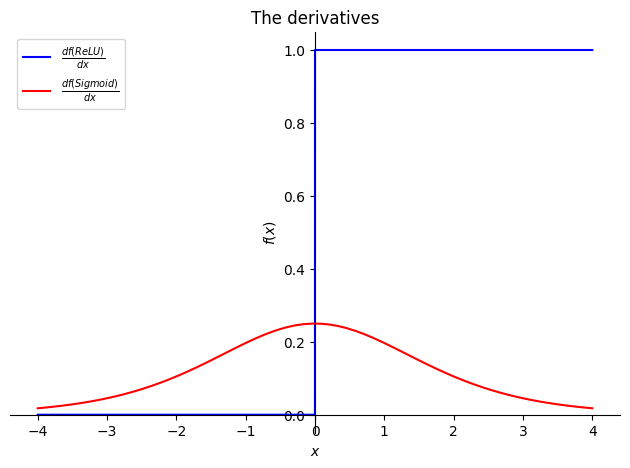

In [44]:
# Visualize the derivatives
# source: udemy.com/course/deeplearning_x/?couponCode=202303
p = symplot(
    sym.diff(relu),
    (x, -4, 4),
    label="$\\frac{df(ReLU)}{dx}$",
    show=False,
    line_color="blue",
)
p.extend(
    symplot(
        sym.diff(sigmoid),
        (x, -4, 4),
        label="$\\frac{df(Sigmoid)}{dx}$",
        show=False,
        line_color="red",
    )
)
p.legend = True
p.title = "The derivatives"
p.show()

#### Product Rule

if $$ y = uv $$ then:

$$ \frac{dy}{dx} = u \frac{dv}{dx} + v \frac{du}{dx}$$

In [45]:
# Apply product rule manually
# y = fx.gx; y' = fx.dg + gx.df

manual_diff = (fx * dg) + (gx * df)
manual_diff

2*x**2*(-12*x**3 + 3*x**2) + 4*x*(-3*x**4 + x**3 + 4)

In [46]:
via_sympy = sym.diff(fx * gx)
via_sympy

2*x**2*(-12*x**3 + 3*x**2) + 4*x*(-3*x**4 + x**3 + 4)

#### Chain Rule

if $$ y = f(u) $$ and $$ u = g(x) $$ then:

$$ \frac{dy}{dx} = \frac{dy}{du} . \frac{du}{dx}$$

<hr><br>

```
e.g.
```

$$ gx = x^2 + 4x^3 $$
$$ fx = (gx)^5 $$

In [47]:
gx = x**2 + (4 * x**3)
fx = (gx) ** 5

display(gx)
display(fx)

4*x**3 + x**2

(4*x**3 + x**2)**5

In [48]:
# Compute the derivative
via_sympy = sym.diff(fx)
via_sympy

(60*x**2 + 10*x)*(4*x**3 + x**2)**4

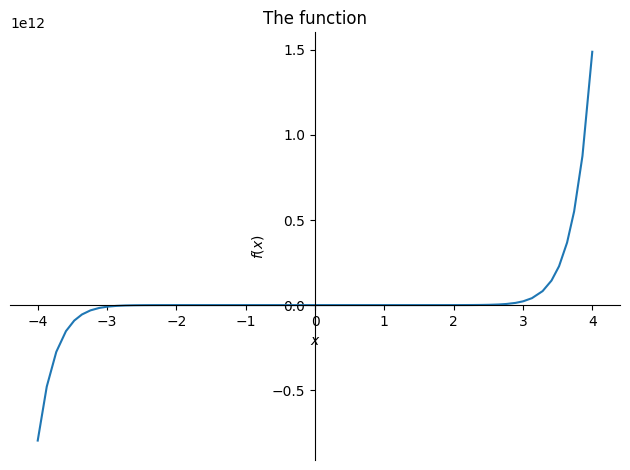

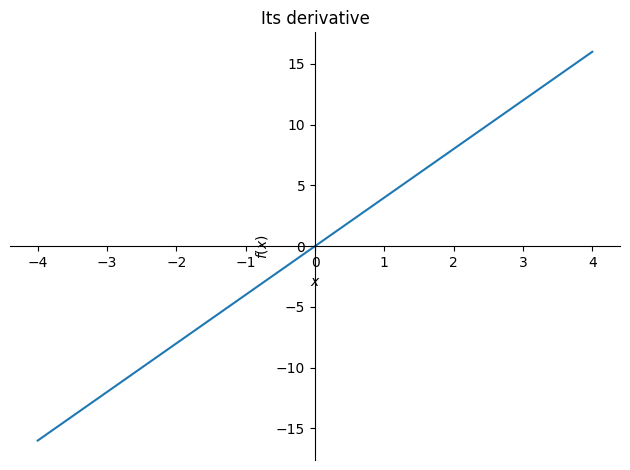

In [49]:
import sympy.plotting.plot as symplot

# plot them
symplot(fx, (x, -4, 4), title="The function")
plt.show()

symplot(df, (x, -4, 4), title="Its derivative")
plt.show()